In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import random
%matplotlib widget

# Please ignore this block.

The code in this block has been used to generate random trajectories for a random number of particles. To avoid generating new trajectories this has been converted to Markdown mode but can be converted back to code to test for new trajectories.

```
# generate a random number of particels bewteen 3 and 100
n = random.randint(3,100)
# create n random coordinates
xyz_0 = np.random.rand(n,3)*100
# define certain timesteps at which the position is 'calculated'
timestep = np.linspace(0, 100, 101)
# create random trajectories for the particles
xyz = np.ndarray((101, n, 3))
xyz[0]=xyz_0
for i in range(100):
    d_xyz = np.random.rand(n,3)
    xyz[i+1] = xyz[i] + d_xyz

# a text document with the timestep and x, y, z positions for each particle
with open('testpos.txt', 'w') as d:
    for t in range(101):
        d.write(str(timestep[t]) + ' ')
        for i in range(n):
            for j in range(3):
                d.write(str(xyz[t][i][j])+ ' ')
        d.write('\n')
```

In [19]:
def trajectories(file):
    """
    This function takes a txt file where the lines contains the timesteps and the positions of the N partilces at that timestep and gives the timesteps and a numpy array with the coordinates of each particle at a timestep.
    The input needs to have the form: t x_1 y_1 z_1 ... x_N y_N z_N
    The output ind_traj has the form [pos_0, ..., pos_t] with pos_i=[[x_0i, y_0i, z_0i], ..., [x_Ni, y_Ni, z_Ni]]
    """
    traj = np.loadtxt(file)
    # get the number of particles and timesteps
    N = int((len(traj[0]) - 1)/3)
    n_t = len(traj)
    # getting the timesteps
    t=np.zeros(n_t)
    # an arry with the trajectories of the N particles
    ind_traj = np.zeros((n_t, N, 3))
    for i in range(n_t):
        t[i] = traj[i][0]
        part_traj = np.split(traj[i][1:], N)
        for j in range(N):
            ind_traj[i][j]= part_traj[j]
    return t, ind_traj

t, test_traj = trajectories('testpos.txt')
n_t = len(t)
N= len(test_traj[0])

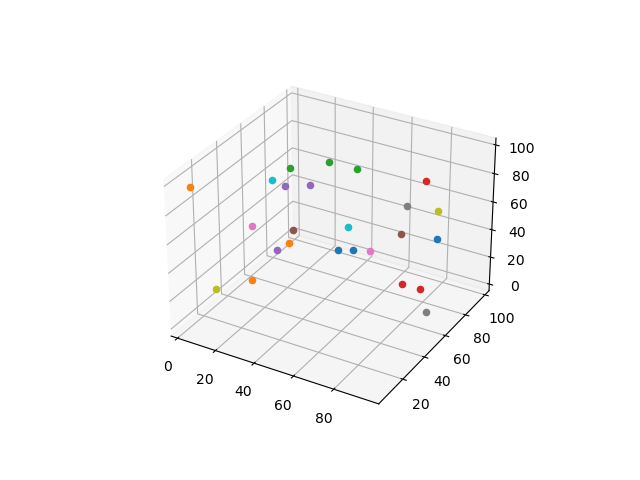

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in test_traj[0]:
    ax.scatter(i[0], i[1], i[2])

plt.show()

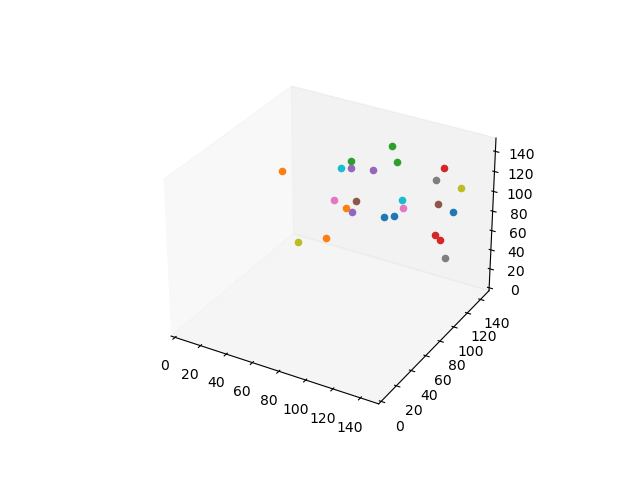

In [21]:
def update(i):
    ax.cla()
    ax.set_xlim(0, 150)
    ax.set_ylim(0, 150)
    ax.set_zlim(0, 150)
    for j in test_traj[i]:
        ax.scatter(j[0], j[1], j[2])
        ax.grid(False)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ani = animation.FuncAnimation(fig, update, frames=n_t)
ani.save('test.mp4', fps=30)